# Info

Use the fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. 
Create a model that will predict whether or not they will click on an ad based off the features of that user.

Columns Explanation:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Info

In [3]:
ad_data = pd.read_csv('advertising.csv')

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis

Text(0.5, 0, 'Age')

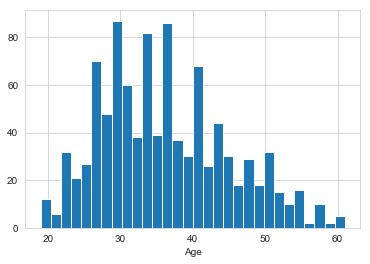

In [6]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30) # Histogram for age
plt.xlabel('Age')

C:\Users\Jae\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


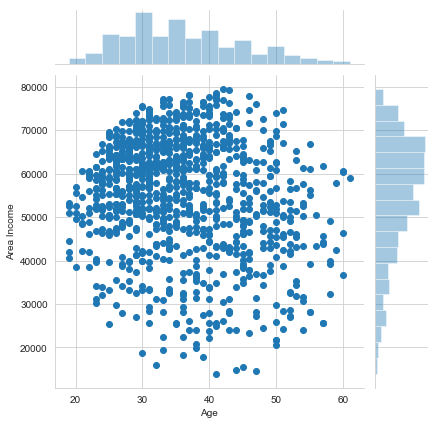

In [7]:
# Jointplot for Area Income versus Age
sns.jointplot(x='Age',y='Area Income',data=ad_data) 
# You start earning after 20s

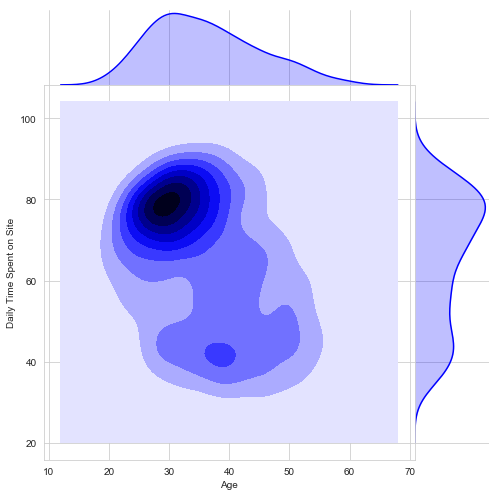

In [8]:
# KDE for Time spent on site vs Age
sns.jointplot(x='Age',y='Daily Time Spent on Site',
              data=ad_data,color='blue',kind='kde', height=7, space=0);

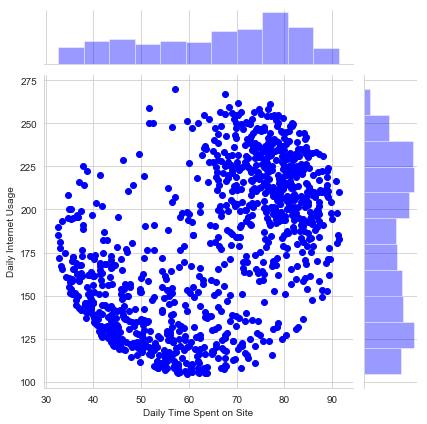

In [9]:
# Jointplot for Daily Time Spent on Site vs Daily Internet Usage
sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',data=ad_data,color='blue')

C:\Users\Jae\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Jae\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Jae\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


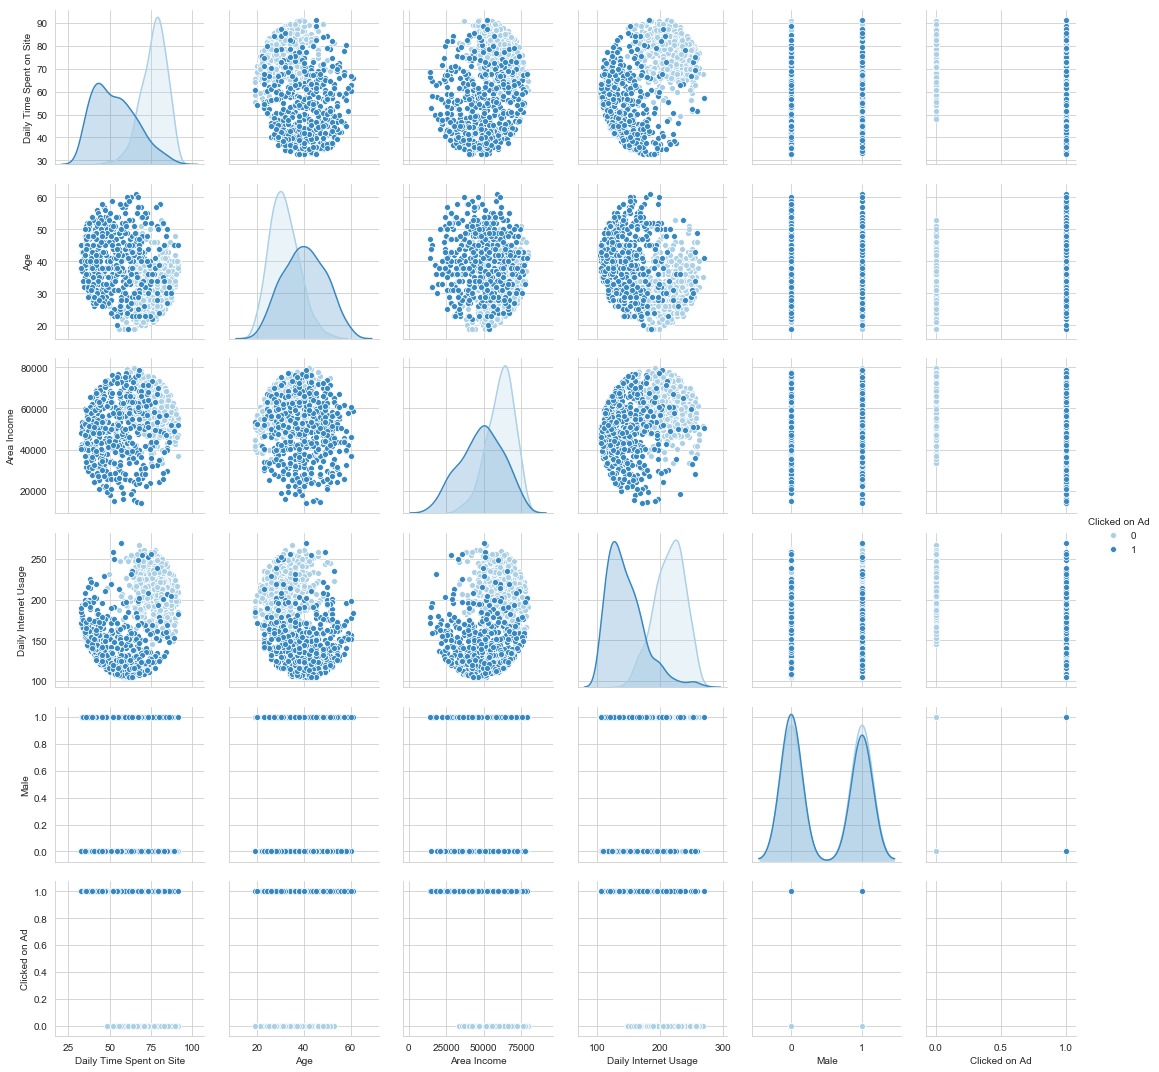

In [10]:
# create pariplot with hue for Clicked on Ad
sns.pairplot(ad_data,hue='Clicked on Ad',palette='Blues')

# Logistic Regression

In [11]:
#Test and Split
from sklearn.model_selection import train_test_split

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Train & fit model on training model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Jae\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# Predictions
predictions = logmodel.predict(X_test)

# Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# Classification Report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [22]:
print(confusion_matrix(y_test,predictions))

[[156   6]
 [ 24 144]]


- Precision: ability of classifier not to label an instance positive that is -negative ** For all instances classified positive, what % was correct? **
- Recall: ability of classifier to find all positives ** For all instances that were actually positive, what percent was classified correctly? **
- F1-Score: weighted harmon mean of precision and recall such that best score is 1.0 and worst is 0.0 ** Average of F1- score should be used to compare classifier model, not global accuracy **
- Support: number of actual occurrences of class in specified dataset